In [106]:
#
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 

In [84]:
df = pd.read_excel('Iris.xlsx')

In [85]:
df.iloc[1:]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [86]:
print(df.shape) 
print(df.columns)
print(df.describe())

(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


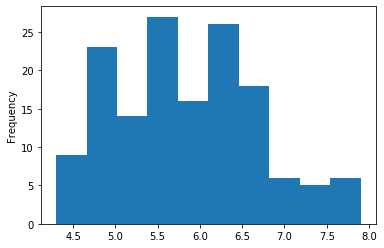

In [87]:
df.SepalLengthCm.plot.hist()

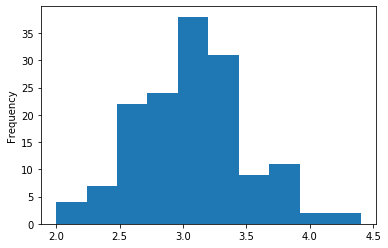

In [88]:
df.SepalWidthCm.plot.hist()

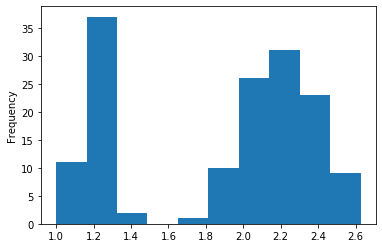

In [89]:
np.sqrt(df['PetalLengthCm']).plot.hist()

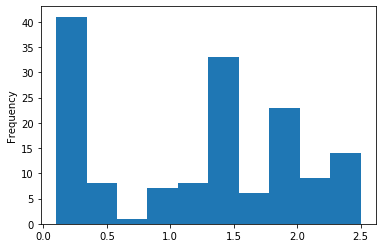

In [90]:
df.PetalWidthCm.plot.hist()

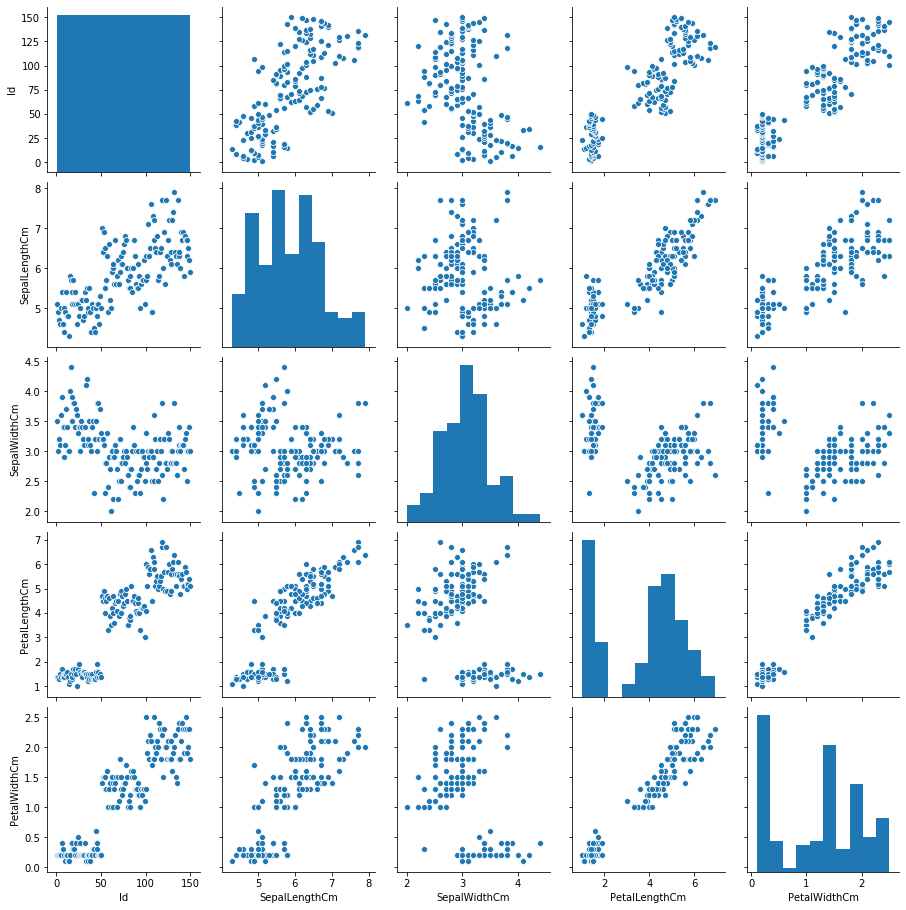

In [91]:
#
import seaborn as sns
sns.pairplot(df)

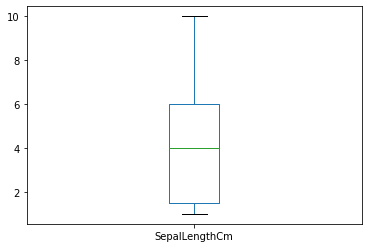

In [96]:
df['SepalLengthCm'].value_counts().plot.box()

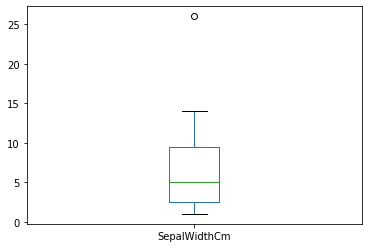

In [97]:
df['SepalWidthCm'].value_counts().plot.box()

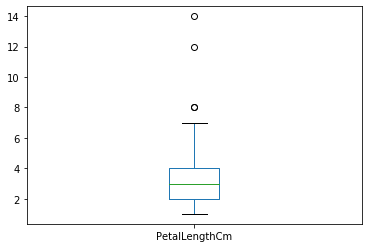

In [98]:
df['PetalLengthCm'].value_counts().plot.box()

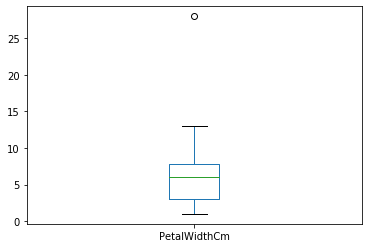

In [99]:
df['PetalWidthCm'].value_counts().plot.box()

In [100]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [101]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


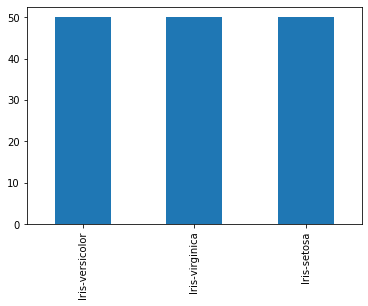

In [102]:
df['Species'].value_counts().plot.bar()

In [103]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [110]:
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [114]:
df['Species'].replace({'Iris-setosa':'1'},inplace=True)
df['Species'].replace({'Iris-virginica':"2"},inplace=True)
df['Species'].replace({'Iris-versicolor':"0"},inplace=True)


In [115]:
df.Species.value_counts()

1    50
0    50
2    50
Name: Species, dtype: int64

In [116]:
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [118]:
norm_func(df.iloc[:,:-1])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...,...
145,0.973154,0.666667,0.416667,0.711864,0.916667
146,0.979866,0.555556,0.208333,0.677966,0.750000
147,0.986577,0.611111,0.416667,0.711864,0.791667
148,0.993289,0.527778,0.583333,0.745763,0.916667


In [120]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [125]:
###### screw plot or elbow curve ############
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))



([<matplotlib.axis.XTick at 0x2370139ee80>,
 <a list of 13 Text xticklabel objects>)

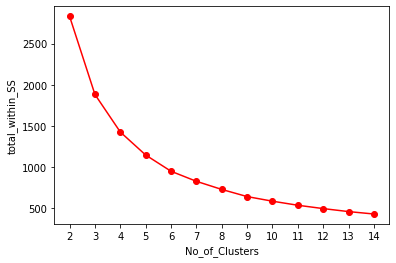

In [127]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)


In [158]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=3) 
y_kmeans=model.fit_predict(df)


In [148]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
df['clust']=md # creating a  new column and assigning it to new column 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clust
0,1,5.1,3.5,1.4,0.2,1,0
1,2,4.9,3.0,1.4,0.2,1,0
2,3,4.7,3.2,1.3,0.2,1,0
3,4,4.6,3.1,1.5,0.2,1,0
4,5,5.0,3.6,1.4,0.2,1,0


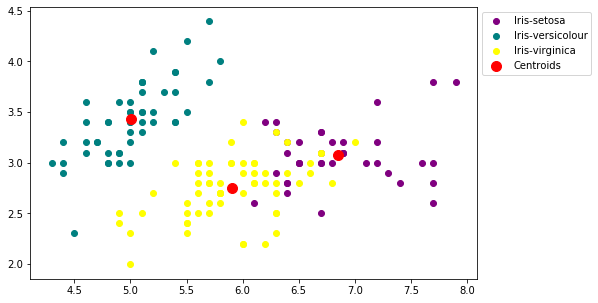

In [168]:

plt.figure(figsize=(8,5))

plt.scatter(df1[y_kmeans == 0]['SepalLengthCm'], 
            df1[y_kmeans == 0]['SepalWidthCm'], 
            c = 'purple', label = 'I')

plt.scatter(df1[y_kmeans == 1]['sepal length (cm)'], 
            df1[y_kmeans == 1]['sepal width (cm)'], 
            c = 'teal', label = 'Iris-versicolour')

plt.scatter(df1[y_kmeans == 2]['sepal length (cm)'], 
            df1[y_kmeans == 2]['sepal width (cm)'],
         c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend(bbox_to_anchor=(1,1),loc=2)